### Business goal

We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.model_selection import KFold , cross_val_predict , GridSearchCV , train_test_split
from sklearn.preprocessing import StandardScaler , PolynomialFeatures , LabelEncoder
from scipy.stats.mstats import normaltest

from math import radians, cos, asin, acos, sqrt

**Reading data**

In [3]:
data = pd.read_csv('CarPrice.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

**Null values**

In [5]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

There aren't null values

**Duplicated values**

In [6]:
data.duplicated().sum()

0

There aren't duplicated values

**Extracting car brand**

In [7]:
data['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [8]:
data['brand'] = data.CarName.str.split(' ').str.get(0).str.lower()

In [9]:
data.brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [10]:
data['brand'] = data['brand'].replace(['vokswagen' , 'vw'] , 'volkswagen')
data['brand'] = data['brand'].replace(['maxda'] , 'mazda')
data['brand'] = data['brand'].replace(['toyouta'] , 'toyota')
data['brand'] = data['brand'].replace(['porcshce'] , 'porsche')

In [11]:
data.brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

**Deleting uneccessary features**

In [17]:
data.drop(['car_ID' , 'symboling' , 'CarName'] , axis=1 , inplace = True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          205 non-null    object 
 1   aspiration        205 non-null    object 
 2   doornumber        205 non-null    object 
 3   carbody           205 non-null    object 
 4   drivewheel        205 non-null    object 
 5   enginelocation    205 non-null    object 
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  enginetype        205 non-null    object 
 12  cylindernumber    205 non-null    object 
 13  enginesize        205 non-null    int64  
 14  fuelsystem        205 non-null    object 
 15  boreratio         205 non-null    float64
 16  stroke            205 non-null    float64
 1

**Descriptive statistics with numerical data**

In [4]:
numeric_data = data.select_dtypes(include = ['number'])
numeric_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


**Descriptive statistics with categorial data**

In [5]:
categorial_data = data.select_dtypes(include = ['object'])
categorial_data.describe()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


**Using boxplot to visualize the relationship between the target and categorial variables**

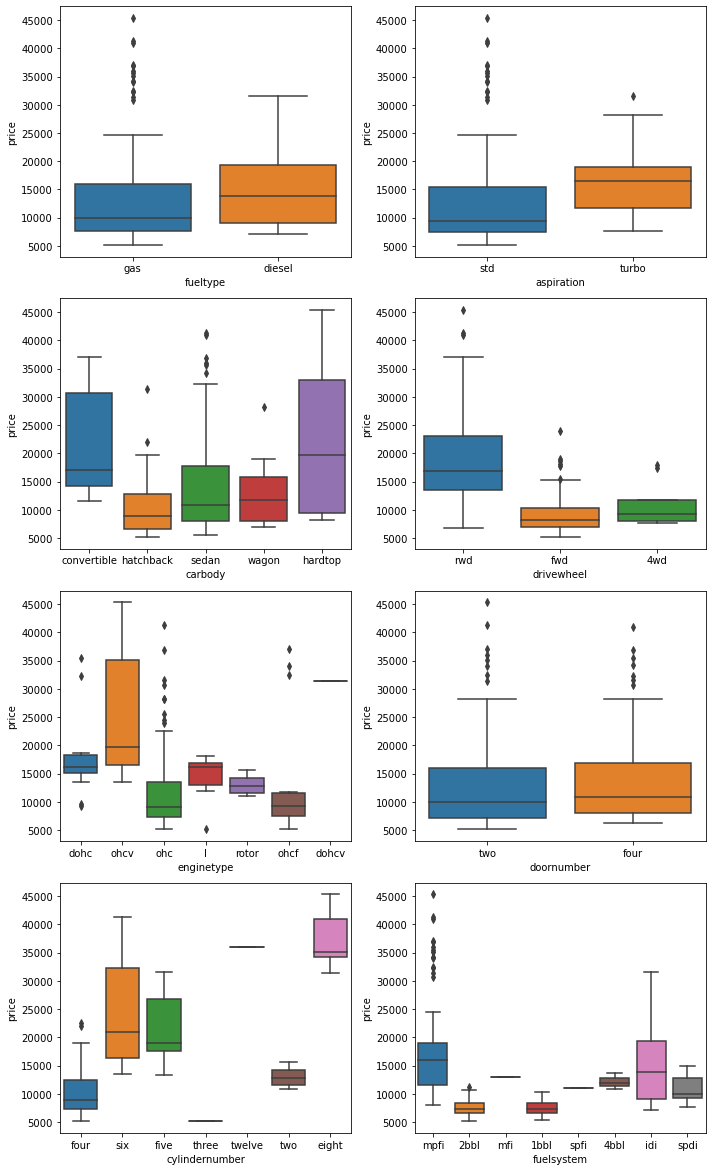

In [19]:
plt.figure(figsize=(10, 20))
plt.subplot(5,2,1)
sns.boxplot(x = 'fueltype', y = 'price', data = data)
plt.subplot(5,2,2)
sns.boxplot(x = 'aspiration', y = 'price', data = data)
plt.subplot(5,2,3)
sns.boxplot(x = 'carbody', y = 'price', data = data)
plt.subplot(5,2,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = data)
plt.subplot(5,2,5)
sns.boxplot(x = 'enginetype', y = 'price', data = data)
plt.subplot(5,2,6)
sns.boxplot(x = 'doornumber', y = 'price', data = data)
plt.subplot(5,2,7)
sns.boxplot(x = 'cylindernumber', y = 'price', data = data)
plt.subplot(5,2,8)
sns.boxplot(x = 'fuelsystem', y = 'price', data = data)
plt.tight_layout()
plt.show()

In some features (**`door number`** , **`aspiration`** , **`fuel type`**) there is overlap between price distributions for all categories in the feature and this means that they are not good predictors

**Using regression plot to visualize the relationship between numerical values and price**

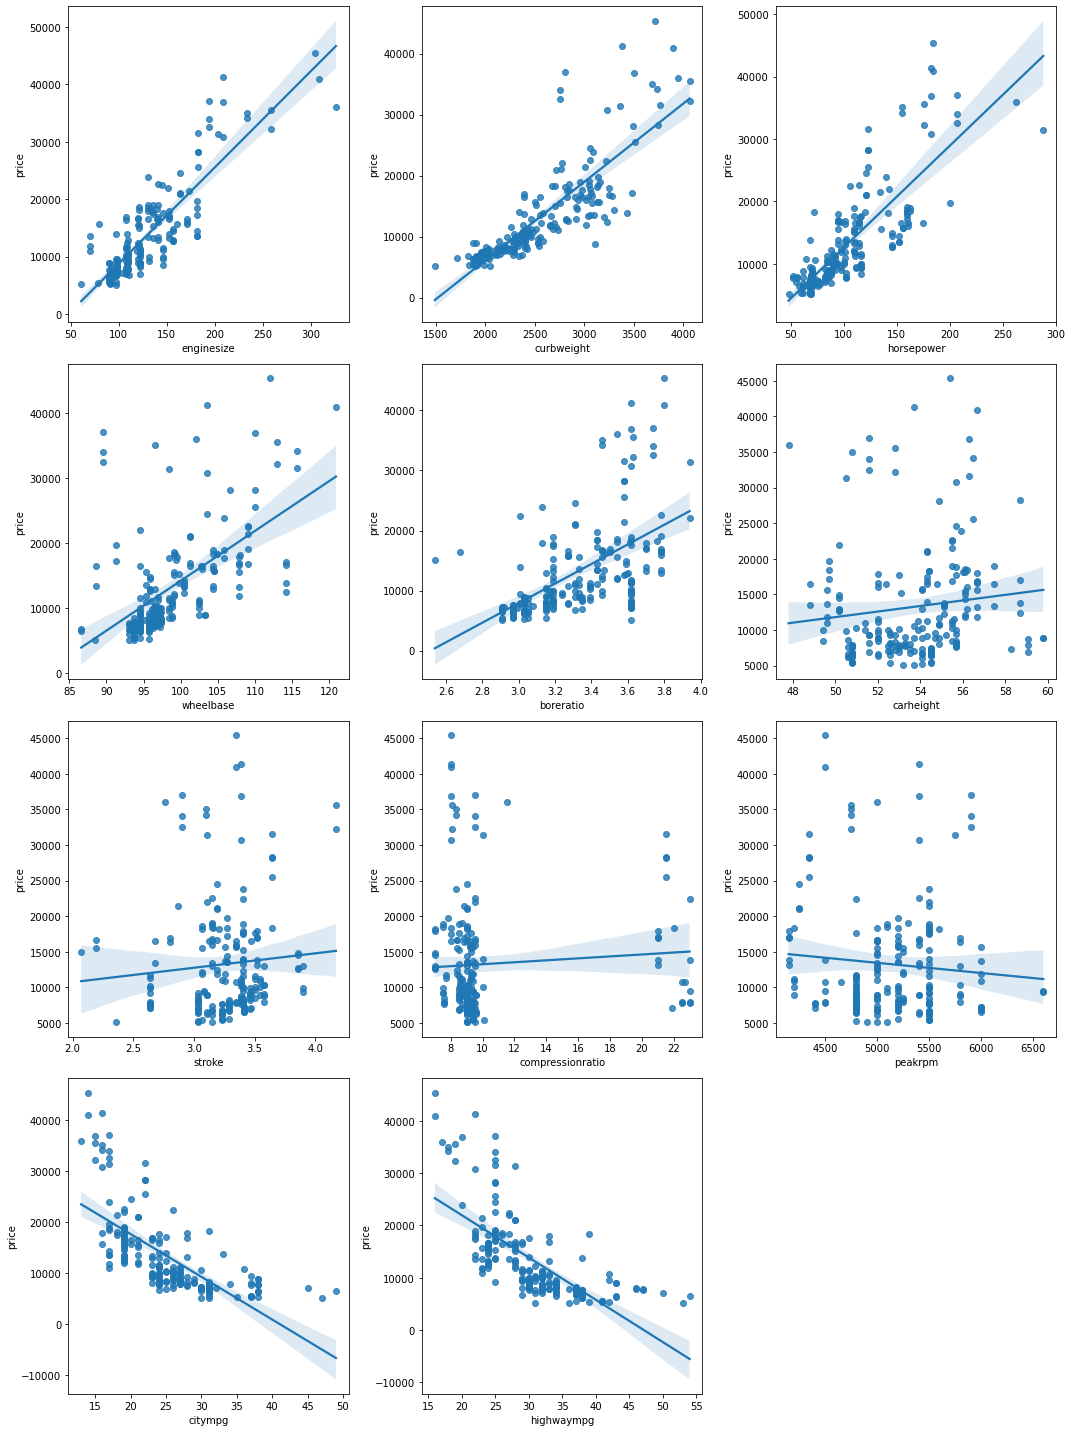

In [20]:
plt.figure(figsize=(15, 20))
plt.subplot(4,3,1)
sns.regplot(x = 'enginesize', y = 'price', data = data)
plt.subplot(4,3,2)
sns.regplot(x = 'curbweight', y = 'price', data = data)
plt.subplot(4,3,3)
sns.regplot(x = 'horsepower', y = 'price', data = data)
plt.subplot(4,3,4)
sns.regplot(x = 'wheelbase', y = 'price', data = data)
plt.subplot(4,3,5)
sns.regplot(x = 'boreratio', y = 'price', data = data)
plt.subplot(4,3,6)
sns.regplot(x = 'carheight', y = 'price', data = data)
plt.subplot(4,3,7)
sns.regplot(x = 'stroke', y = 'price', data = data)
plt.subplot(4,3,8)
sns.regplot(x = 'compressionratio', y = 'price', data = data)
plt.subplot(4,3,9)
sns.regplot(x = 'peakrpm', y = 'price', data = data)
plt.subplot(4,3,10)
sns.regplot(x = 'citympg', y = 'price', data = data)
plt.subplot(4,3,11)
sns.regplot(x = 'highwaympg', y = 'price', data = data)
plt.tight_layout()
plt.show()

 There are weak linear relationships between the target and (**`stroke`** , **`compressionratio`** , **`peakrpm`** ) as fitted lines are nearly horizontal

**Calculating correlation coefficients between the target and independent numerical features**

In [5]:
numeric_data = data.select_dtypes(include = ['number'])
corr = numeric_data.corr()['price'].sort_values(ascending=False)
corr

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
car_ID             -0.109093
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

* As we concluded from regression plots (**`stroke`** , **`compressionratio`** , **`peakrpm`**) are not good predictors 
* Carheight has a weak correlaion
* (**`wheelbase`** , **`boreratio`**) have moderate correlations
* (**`citympg`** , **`highwaympg`** , **`carlength`** , **`highwaympg`**) have good correlaions
* (**`horsepower`** , **`curbweight`** , **`enginesize`** ) have very strong correlations

**Multicolliniarity**

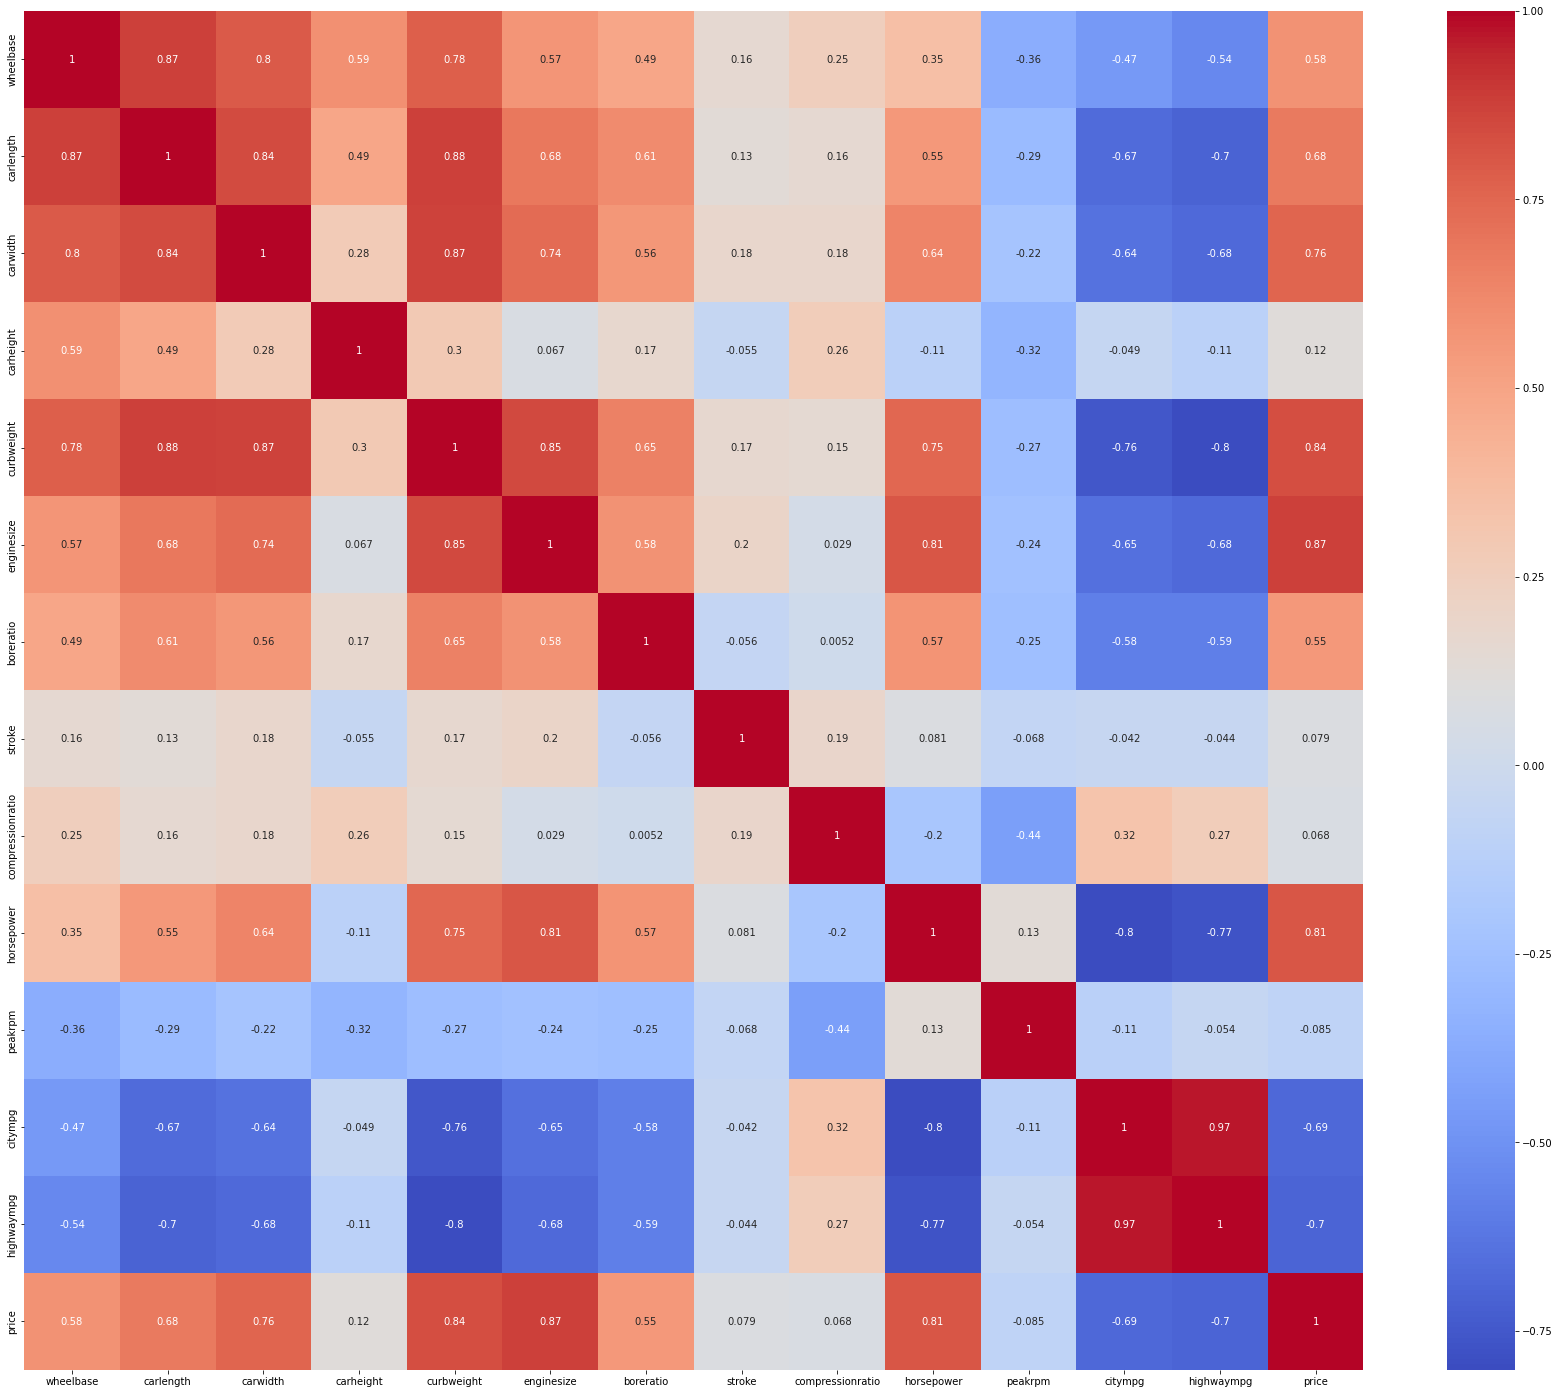

In [71]:
plt.figure(figsize = (30,25))
sns.heatmap(numeric_data.corr() , annot=True, cmap='coolwarm')
plt.show()

We can see that there is multicolliniarity , using ridge regression can help manage multicollinearity by shrinking coefficients .

**Target distribution**

In [ ]:
plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
sns.distplot(data['price'])

plt.subplot(1,2,2)
sns.boxplot(data['price'])

plt.show()

The target distribution is **right skewed** , it doesn't have normal distibution

In [24]:
normaltest(data.price.values)

NormaltestResult(statistic=77.37514013383584, pvalue=1.578344501676757e-17)

 Doing the normal test , p-value is very small and this means that it's not normal distributed at all

**Transforming the target using boxcox**

In [25]:
from scipy.stats import boxcox

In [26]:
cp_result = boxcox(data.price)
boxcox_price = cp_result[0]
normaltest(boxcox_price)

NormaltestResult(statistic=16.727142005583726, pvalue=0.00023321005129893173)

p-value is still smaller but it's much larger than before

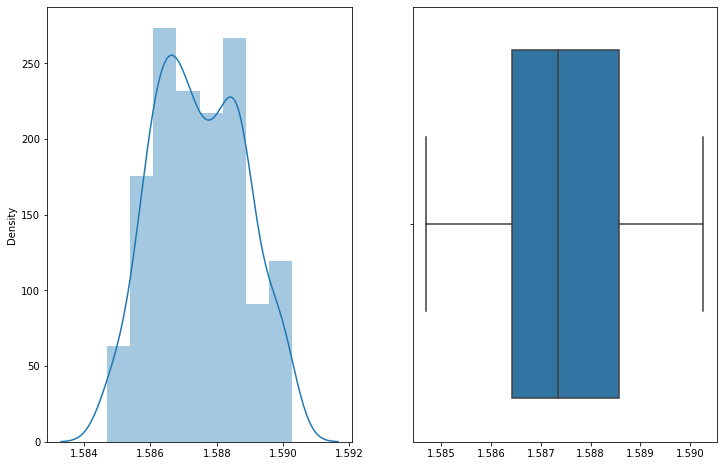

In [27]:
plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
sns.distplot(boxcox_price)

plt.subplot(1,2,2)
sns.boxplot(boxcox_price)

plt.show()

Distribution is more normal , but we can try another transformation

**Log transformation**

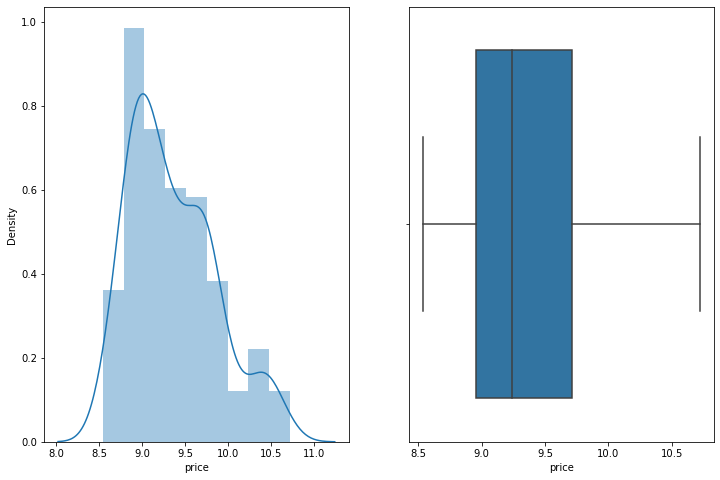

In [29]:
plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
sns.distplot(log_price)

plt.subplot(1,2,2)
sns.boxplot(log_price)

plt.show()

In [28]:
log_price = np.log(data['price'])
normaltest(log_price)

NormaltestResult(statistic=14.10341345775947, pvalue=0.0008659297880185564)

Log transformation has better p-value

**Selecting important features**

In [81]:
columns=['fuelsystem','carbody', 'drivewheel','wheelbase', 'brand'
         ,'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
         'carlength','carwidth','citympg','highwaympg' , 'price']
selected = data[columns]
selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fuelsystem      205 non-null    object 
 1   carbody         205 non-null    object 
 2   drivewheel      205 non-null    object 
 3   wheelbase       205 non-null    float64
 4   brand           205 non-null    object 
 5   curbweight      205 non-null    int64  
 6   enginetype      205 non-null    object 
 7   cylindernumber  205 non-null    object 
 8   enginesize      205 non-null    int64  
 9   boreratio       205 non-null    float64
 10  horsepower      205 non-null    int64  
 11  carlength       205 non-null    float64
 12  carwidth        205 non-null    float64
 13  citympg         205 non-null    int64  
 14  highwaympg      205 non-null    int64  
 15  price           205 non-null    float64
dtypes: float64(5), int64(5), object(6)
memory usage: 25.8+ KB


**One-hot encoding**

One-hot encoding transforms categorical variables into a format where each category is represented by a binary vector. Each unique category is converted into a new binary feature (column), where a 1 indicates the presence of that category and a 0 indicates its absence.
it ensures that categorical data is represented numerically without implying any ordinal 
relationships . It avoids imposing any ordinal relationship between categories, which is important if the categorical variable has no natural order.



In [74]:
encoded = pd.get_dummies(selected)
encoded

,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg,price,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,88.6,2548,130,3.47,111,168.8,64.1,21,27,9.510075,...,0,0,0,0,0,1,0,0,0,0
1,88.6,2548,130,3.47,111,168.8,64.1,21,27,9.711116,...,0,0,0,0,0,1,0,0,0,0
2,94.5,2823,152,2.68,154,171.2,65.5,19,26,9.711116,...,0,1,0,0,0,0,1,0,0,0
3,99.8,2337,109,3.19,102,176.6,66.2,24,30,9.543235,...,0,0,0,0,0,1,0,0,0,0
4,99.4,2824,136,3.19,115,176.6,66.4,18,22,9.767095,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,2952,141,3.78,114,188.8,68.9,23,28,9.731809,...,0,0,0,0,0,1,0,0,0,0
201,109.1,3049,141,3.78,160,188.8,68.8,19,25,9.854560,...,0,0,0,0,0,1,0,0,0,0
202,109.1,3012,173,3.58,134,188.8,68.9,18,23,9.975110,...,0,1,0,0,0,0,1,0,0,0
203,109.1,3217,145,3.01,106,188.8,68.9,26,27,10.019936,...,0,0,0,0,0,0,1,0,0,0


# Building the model

**Multilinear reression**

Multilinear is a statistical technique used to model the relationship between a dependent variable and multiple independent variables. This method extends simple linear regression by allowing for more than one predictor.

In multilinear regression, the model can be expressed as:
$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p + \epsilon$$

The goal of multilinear regression is to find the coefficients $\beta_0,\beta_1,\beta_2,..,\beta_p$  that minimize the difference between the observed values and the predicted values. This is typically achieved by minimizing the Residual Sum of Squares (RSS):
$$\text{RSS} = \frac{1}{2} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

In [75]:
x = encoded.drop('price' , axis=1)
y = log_price

,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg,fuelsystem_1bbl,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,88.6,2548,130,3.47,111,168.8,64.1,21,27,0,...,0,0,0,0,0,1,0,0,0,0
1,88.6,2548,130,3.47,111,168.8,64.1,21,27,0,...,0,0,0,0,0,1,0,0,0,0
2,94.5,2823,152,2.68,154,171.2,65.5,19,26,0,...,0,1,0,0,0,0,1,0,0,0
3,99.8,2337,109,3.19,102,176.6,66.2,24,30,0,...,0,0,0,0,0,1,0,0,0,0
4,99.4,2824,136,3.19,115,176.6,66.4,18,22,0,...,0,0,0,0,1,0,0,0,0,0


**Pipeline**

The Pipeline class in scikit-learn is a powerful utility that helps in organizing a machine learning workflow. It allows us to sequentially apply a list of transforms and a final estimator, ensuring that all steps are executed in the correct order. This is particularly useful for simplifying the code, improving reproducibility .

In [59]:
estimator = Pipeline([('scaler' , StandardScaler()),('lr' , LinearRegression())])

**K-Fold Cross-Validation**

K-Fold Cross-Validation is a method for evaluating a model’s performance by dividing the dataset into multiple subsets or "folds." The model is trained on some folds and tested on the remaining folds. This process is repeated multiple times, with each fold serving as the test set once. The results are then averaged to provide a more robust estimate of the model's performance.

In [60]:
kf = KFold(shuffle=True, random_state=72018, n_splits=3)

In [61]:
predictions = cross_val_predict(estimator, x, y, cv=kf)

**$R^2$ Score**

It is a statistical metric used to evaluate the performance of a regression model. It measures the proportion of the variance in the dependent variable.
The R² score is calculated using the following formula:
$$
R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}}
$$
where:
* $SS_{res}$ (Residual Sum of Squares) is the sum of the squared differences between the observed values and the predicted values.
$
\text{SS}_{\text{res}} = \sum_{i=1}^n (y_i - \hat{y}_i)^2
$
* $SS_{tot}$ (Total Sum of Squares) is the sum of the squared differences between the observed values and the mean of the actual values.
$
\text{SS}_{\text{tot}} = \sum_{i=1}^n (y_i - \bar{y})^2
$

In [62]:
r2_score(y, predictions)

-1.4964853454776813e+22

There is **overfitting** because r2 score is negative, We can solve this problem by **regularization**

**Lasso regression**

(least absolute shrinkage and selection operator) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model . Includes an L1 regularization term in its cost function .

$\text{Lasso Cost Function} = \frac{1}{2} \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^p |\beta_j|
$

In [63]:
alphas = np.geomspace(1e-9, 1e0, num=10)
alphas

array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00])

In [64]:
scores = []

for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", StandardScaler()),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, x, y, cv = kf)
    
    score = r2_score(y, predictions)
    
    scores.append(score)


In [65]:
list(zip(alphas,scores))

[(1e-09, 0.911275178220309),
 (1e-08, 0.9118075836026635),
 (1e-07, 0.9125293340605966),
 (1e-06, 0.9100645349303826),
 (1e-05, 0.9104206127413076),
 (0.0001, 0.9129767910758333),
 (0.001, 0.9216113418837404),
 (0.01, 0.920402444391942),
 (0.1, 0.7977917644310528),
 (1.0, -0.003043554066154419)]

Text(0, 0.5, '$R^2$')

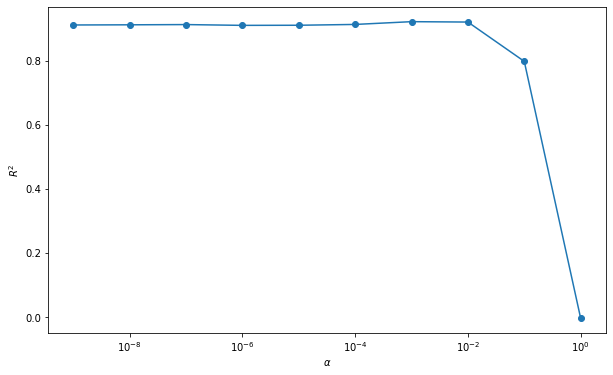

In [66]:
plt.figure(figsize=(10,6))
plt.semilogx(alphas, scores, '-o')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$')

Best score is at .001

In [79]:
las = Lasso(alpha=.001, max_iter=100000)

estimator = Pipeline([
    ("scaler", StandardScaler()),
    ("lasso_regression", las)])

predictions = cross_val_predict(estimator, x, y, cv = kf)

score = r2_score(y, predictions)
score

0.9216113418837404

**GridSearchCV**

GridSearchCV is a powerful tool provided by scikit-learn for tuning hyperparameters of a machine learning model. It systematically searches through a specified set of hyperparameters to find the combination that yields the best performance according to a given evaluation metric.

In [68]:
estimator = Pipeline([("polynomial", PolynomialFeatures()),
        ("scaler", StandardScaler()),
        ("lasso", Lasso())])

params = {
    'polynomial__degree': [1, 2, 3],
    'lasso__alpha': np.geomspace(1e-9, 1e0, num=10)
}

grid = GridSearchCV(estimator, params, cv=kf)

In [69]:
grid.fit(x,y)

GridSearchCV(cv=KFold(n_splits=3, random_state=72018, shuffle=True),
             estimator=Pipeline(steps=[('polynomial', PolynomialFeatures()),
                                       ('scaler', StandardScaler()),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00]),
                         'polynomial__degree': [1, 2, 3]})

In [47]:
y_predict = grid.predict(x)

In [48]:
r2_score(y, y_predict)

0.9593315562167685

**Ridge regression**

Ridge regression is a type of linear regression that includes an L2 regularization term in its cost function. This regularization term penalizes large coefficients, which helps to prevent overfitting and improve the generalization of the model.

$
\text{Ridge Cost Function} = \frac{1}{2} \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^p \beta_j^2
$

In [49]:
estimator = Pipeline([("polynomial", PolynomialFeatures()),
        ("scaler", StandardScaler()),
        ("ridge", Ridge())])

params = {
    'polynomial__degree': [1, 2, 3],
    'ridge__alpha': np.geomspace(4, 20, num=20)
}

grid1 = GridSearchCV(estimator, params, cv=kf)

In [50]:
grid1.fit(x,y)

GridSearchCV(cv=KFold(n_splits=3, random_state=72018, shuffle=True),
             estimator=Pipeline(steps=[('polynomial', PolynomialFeatures()),
                                       ('scaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'polynomial__degree': [1, 2, 3],
                         'ridge__alpha': array([ 4.        ,  4.3535936 ,  4.73844431,  5.15731521,  5.61321363,
        6.10941274,  6.64947505,  7.23727802,  7.87704182,  8.57335972,
        9.331231  , 10.1560969 , 11.05387963, 12.03102491, 13.09454827,
       14.25208539, 15.51194695, 16.88317825, 18.37562421, 20.        ])})

In [51]:
y_predict = grid.predict(x)

In [52]:
r2_score(y, y_predict)

0.9593315562167685